# MACHINE LEARNING PROBLEM SOLVING APPROACH
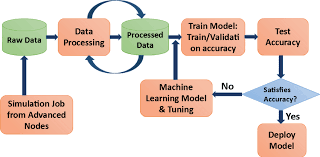

## Looks compilcated? We will get a hold of it

# Problem
* There are different typea of glasses.
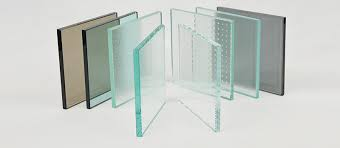
* The glasses differ each other from their quantities of the constituent elements.
* Given the constituents and their percentage in a glass, our goal is to identify the type of glass.
* Here we have 7 different types of classes.

# ML Problem Framing
* If we see our problem, it is a classification problem.
* 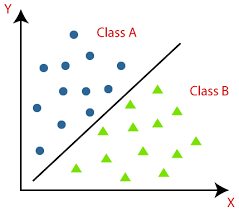
* We can use Machine Learning various machine learning approaches to model this problem.

## But which approach gives best results? This is where we get the intuition behind the iterative process of Machine Learning.
* We try many approaches repetitively, and select the best one.
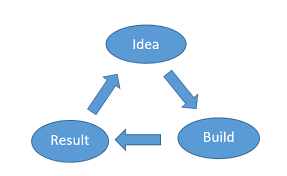!

# Data Collection
* Machine learning reqiures data to train from. In our case it is a well labelled data.
* Link: https://www.kaggle.com/uciml/glass
* The data is in well defined CSV format
* This dataset is given by UCI, one of the largest centres for Machine Learning datasets<br>
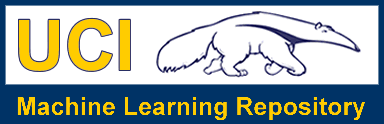

# Data Integration
* We now have to integrate or put together our collected data with our working notebook.<br><br>
1) Download the CSV file from the link and copy it in the working directory (same directory of the notebook)<br><br>
2) Read the data using library called **pandas**. It is a well known data handler for Python and Machine Learning.

In [1]:
import pandas as pd
data = pd.read_csv('../input/glass/glass.csv') # Function for reading a CSV file

# Data Preparation and Cleaning
* Our model's performance is entirely dependent on data we give it to train.
* So, this data should be clean, standard and well ordered.

 ### Lets look at the data
 * The head() function of the pandas give a good and neat glance at our data

In [2]:
data.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


* As you can see, the first column is for indexing and the first row is for the naming of columns.
* We can give our own names and indexing to the data, but it is not reqiured here.
* The columns from 1 to 9 **(0 based)** are the attriutes or features of our data.
* The last column **"Type"** is our target or to be predicted feature and has 7 different classes.

# Data Visualization
* To preprocess or standardize the data, we need to have a look at the data.
* Data visualization is an important part to identify unbalanced classes, correlations between data, feature engineering, feature elimination, etc.
* We visualize data mostly in the form of user friendly plots, graphs.

## 1) Class Distribution and Imbalance
* We can see how many samples are there for each class. Ideally we want them to have equal and more samples for best results.
* We can visualize this didtribution using bar plots or histograms.
* A histogram is a bar plot showing the frequency distributions of the variable.
* Seaborn is a library for making statistical graphics in Python. It is built on top of matplotlib and closely integrated with pandas data structures.
*  In seaborn, it’s easy to do so with the catplot() function.
* Refer "https://seaborn.pydata.org/tutorial/categorical.html#categorical-tutorial" for more detailed explanations and options.

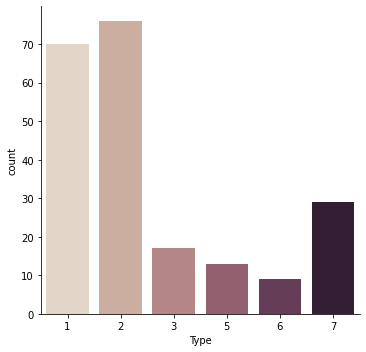

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.catplot(x="Type", kind="count", palette="ch:.25", data=data)

* As you can see the data samples are more biased to the 1st and 2nd types of glasses.
* There is no data for the 4th class.
* In practice, we can collect more data on other classes and train our model, but here we shall continue the process.
* So this visualization gave you the insight on the distribution of classes and now you know what data you should look for, instead of collecting garbage.

## 2) Scatter Plots
* The most familiar way to visualize a bivariate distribution is a scatterplot, where each observation is shown with point at the x and y values.
* We will use it to see how each feature relates to the class.

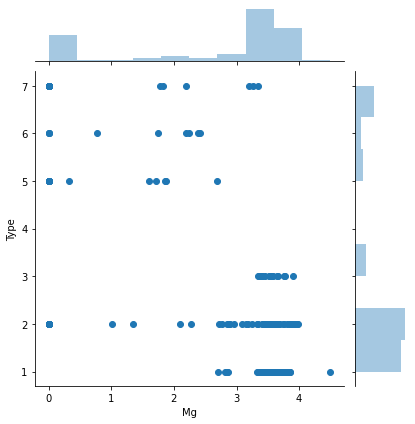

In [4]:
sns.jointplot(x="Mg", y="Type", data=data);

* We can see that the magnesium content for class1 amd class2 are very high in general as compared to other classes.

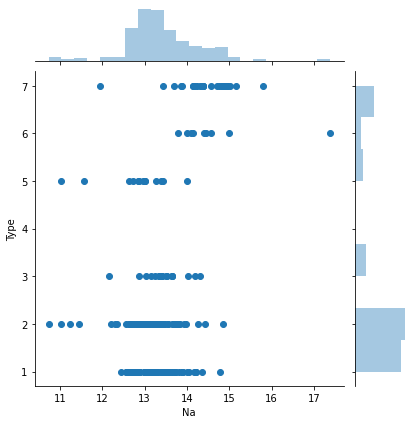

In [5]:
sns.jointplot(x="Na", y="Type", data=data);

* As you can see, the sodium content really doesnt matter as it is in the same range for all the classes.

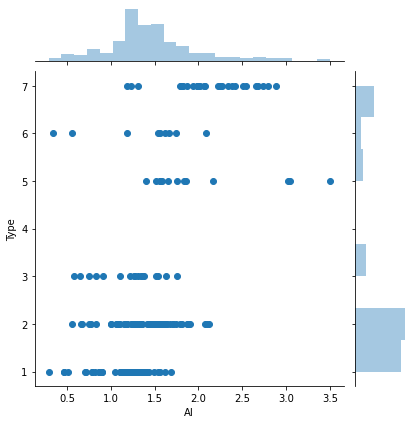

In [6]:
sns.jointplot(x="Al", y="Type", data=data);

* We can see that the magnesium content for class1, class2 and class3 is very low in general as compared to other classes.

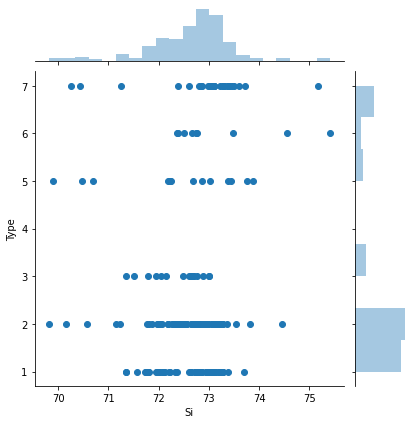

In [7]:
sns.jointplot(x="Si", y="Type", data=data);

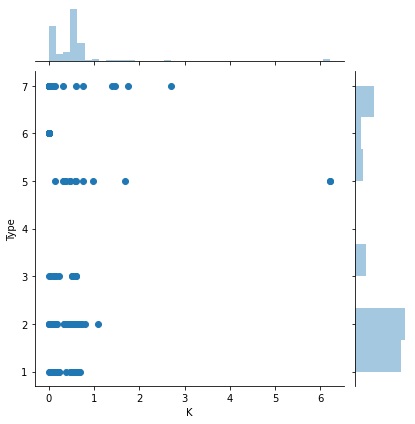

In [8]:
sns.jointplot(x="K", y="Type", data=data);

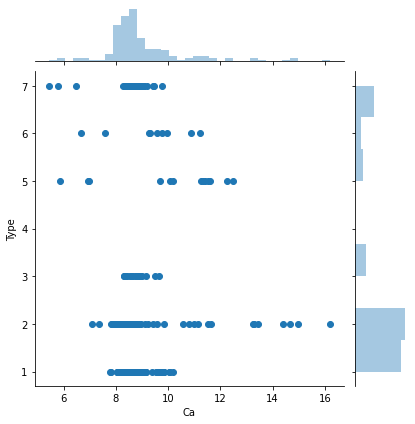

In [9]:
sns.jointplot(x="Ca", y="Type", data=data);

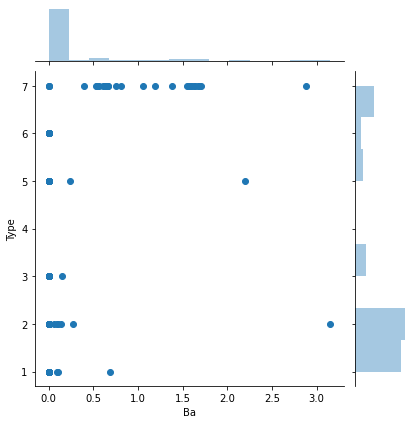

In [10]:
sns.jointplot(x="Ba", y="Type", data=data);

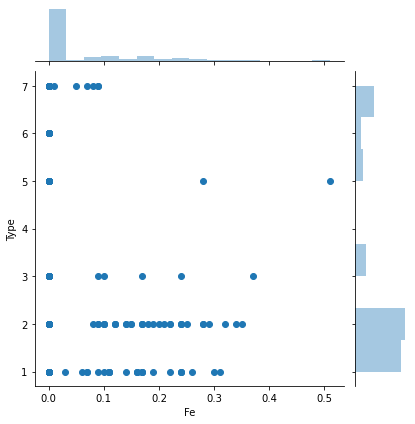

In [11]:
sns.jointplot(x="Fe", y="Type", data=data)

## 3) Correlation plot
* Correlation matrix gives us how one feature is dependent on another.
* If any two features are too dependent on other, then we can remove one.
* The matrix contains n by n entries, where each (i,j) entry is the correlation between the ith feature and jth feature.
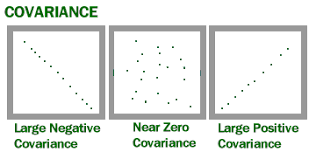
* The corr() function of pandas is used to compute pairwise covariance of columns, excluding NA/null values.

In [12]:
X = data.iloc[:,:-1]
X.corr()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
RI,1.000000,-0.191885,-0.122274,-0.407326,-0.542052,-0.289833,0.810403,-0.000386,0.143010
Na,-0.191885,1.000000,-0.273732,0.156794,-0.069809,-0.266087,-0.275442,0.326603,-0.241346
Mg,-0.122274,-0.273732,1.000000,-0.481799,-0.165927,0.005396,-0.443750,-0.492262,0.083060
Al,-0.407326,0.156794,-0.481799,1.000000,-0.005524,0.325958,-0.259592,0.479404,-0.074402
Si,-0.542052,-0.069809,-0.165927,-0.005524,1.000000,-0.193331,-0.208732,-0.102151,-0.094201
K,-0.289833,-0.266087,0.005396,0.325958,-0.193331,1.000000,-0.317836,-0.042618,-0.007719
Ca,0.810403,-0.275442,-0.443750,-0.259592,-0.208732,-0.317836,1.000000,-0.112841,0.124968
Ba,-0.000386,0.326603,-0.492262,0.479404,-0.102151,-0.042618,-0.112841,1.000000,-0.058692
Fe,0.143010,-0.241346,0.083060,-0.074402,-0.094201,-0.007719,0.124968,-0.058692,1.000000


## Some steps to ensure the sanity of data are:

## 1) Missing Values
* Our collected data can heve some missing values with "NaN" tag. We cannot give it to our model, as it does not understand it.
* Pandas provides some methods specific to missing data. To select NaN entries you can use **"pd.isnull()"**

In [13]:
data.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

* As you can see, there are no missing values when we sum up the missing values for each feature.
* If we have missing values, The **"SimpleImputer"** class of **Scikit Learn** provides basic strategies for imputing missing values. 
* Missing values can be imputed with a provided constant value, or using the statistics (mean, median or most frequent) of each column in which the missing values are located.
* For more analysis on library, visit https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html

In [14]:
from sklearn.impute import SimpleImputer
import numpy as np
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp.fit([[1, 2], [np.nan, 3], [7, 6]]) #Fit using the given array
X = [[np.nan, 2], [6, np.nan], [7, 6]] #Transform an array based on the fitting
print(imp.transform(X))

[[4.         2.        ]
 [6.         3.66666667]
 [7.         6.        ]]


* **Scikit-learn** is a standard,easy-use library used in basic Machine Learning.
* It contains almost every algorithm in Machine Learning and other tools for processing, thus making our developement much faster and easier.
* **numpy** is a mathematical library used to perform any mathematical operations in python

## 2)Dividing the features and target
* iloc is a pandas based tool for selecting and indexing

In [15]:
X = data.iloc[:,:-1]
print(X)
#X.drop(columns=['K','Na']) As we saw the 'Na' and 'K' columns have same ranges for all classes, try removing them and train the model.
Y = data.iloc[:,-1]
print(Y)

          RI     Na    Mg    Al     Si     K    Ca    Ba   Fe
0    1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.00  0.0
1    1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.00  0.0
2    1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.00  0.0
3    1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.00  0.0
4    1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.00  0.0
..       ...    ...   ...   ...    ...   ...   ...   ...  ...
209  1.51623  14.14  0.00  2.88  72.61  0.08  9.18  1.06  0.0
210  1.51685  14.92  0.00  1.99  73.06  0.00  8.40  1.59  0.0
211  1.52065  14.36  0.00  2.02  73.42  0.00  8.44  1.64  0.0
212  1.51651  14.38  0.00  1.94  73.61  0.00  8.48  1.57  0.0
213  1.51711  14.23  0.00  2.08  73.36  0.00  8.62  1.67  0.0

[214 rows x 9 columns]
0      1
1      1
2      1
3      1
4      1
      ..
209    7
210    7
211    7
212    7
213    7
Name: Type, Length: 214, dtype: int64


## 3) Scaling or Normalizing the data
* Consider the example where one feauture in the number of rooms (range: 1-10) and other is price (range: 10000-5000000).
* Clearly, the feautures have different ranges which makes one feature dominant over another while updating gradients, and also slows the process.
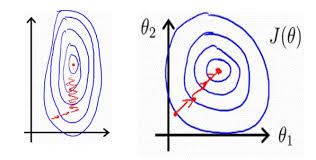
* Some alogorithms like SVM, Naive Bayes requires the data in a normalized form in order to work.
* So we normalize or standardize the data by making every **feature zero mean and unit variance**.
* Scikit Learn provides **"StandardScalar()"** to do this task for us.
* For more analysis on library, visit https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

In [16]:
from sklearn.preprocessing import StandardScaler
scaler  = StandardScaler()
scaler.fit(X)
X_std = scaler.transform(X)

## 4) k-fold Cross-Validation
* It is a best practice to divide the data into train and test to see how our model is working on unseen data.
* But we have less data. test data cannot give surity to our results and also train data is not suffucient to train. 
* So as an alternative we use **k-fold cross validation**

* Cross-validation is primarily used in applied machine learning to estimate the skill of a machine learning model on unseen data. That is, to use a limited sample in order to estimate how the model is expected to perform in general.<br>
* The procedure has a single parameter called k that refers to the number of groups that a given data sample is to be split into. As such, the procedure is often called k-fold cross-validation.
<br>
* It is a popular method and standard method used in selection of algorithms.
<br><br>

### Working <br>

Imagine we have a data sample with 6 observations:
<br>
 [0.1, 0.2, 0.3, 0.4, 0.5, 0.6]
<br>
* The first step is to pick a value for k in order to determine the number of folds used to split the data. Here, we will use a value of k=3. 
* That means we will shuffle the data and then split the data into 3 groups. Because we have 6 observations, each group will have an equal number of 2 observations.<br><br>
Fold1: [0.5, 0.2]<br>
Fold2: [0.1, 0.3]<br>
Fold3: [0.4, 0.6]
<br><br>
* Three models are trained and evaluated with each fold given a chance to be the held out test set.<br>
<br>
Model1: Trained on Fold1 + Fold2, Tested on Fold3<br>
Model2: Trained on Fold2 + Fold3, Tested on Fold1<br>
Model3: Trained on Fold1 + Fold3, Tested on Fold2
<br><br>
* The models are then discarded after they are evaluated as they have served their purpose.
* The skill scores are collected for each model,summarized for use and the best average scored model is selected.

### API <br>
* We do not have to implement k-fold cross-validation manually. The scikit-learn library provides an implementation that will split a given data sample up.

* The KFold() and cross_val_score() scikit-learn classes can be used. It takes as arguments the number of splits, whether or not to shuffle the sample, and the seed for the pseudorandom number generator used prior to the shuffle.<br>
**ex: kfold = KFold(3, True, 1)**
* For more analysis on library, visit https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html
   and https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html

In [17]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
#sample code cell, do not run
kfold = KFold(n_splits=10, random_state=0)
cv_result = cross_val_score(model,X_train,Y_train.values.ravel(),cv = kfold,scoring = "accuracy")
# returns the above defined score for given "model" and "kfold" partitioning

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


NameError: name 'model' is not defined

# Model Training
* We use classification models to classify the type of wine.
* But which model is the best. So, here comes the iterative process involved in Machine Learning.
* In an itertative process, we try different models with different settings, and picks up the one which performs the best based on the above defined k-fold metrics.

In [18]:
#We take a list of models and its accuracies
model_names = []
model_accuracy = []

### MODEL-1 (LOGISTIC REGRESSION) ###
* This is the simplest classification algorithm we can use in ML.
* It draws linear-like boundaries between classes two differenciate them.
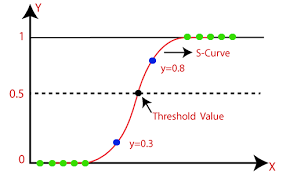
* It uses a function called sigmoid which squashes the values between 0 and 1 (like probability).
* This can be extended to multiclass by taking one to many technique.
* Abstracting us from the complexity, scikit learn gives us LogisticRegression() to achieve our objective.
* For more detailed explanation of the function, visit https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [19]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(multi_class="multinomial",max_iter=7600)
kfold = KFold(n_splits=8, random_state=0,shuffle=True)
cv_result = cross_val_score(model,X,Y, cv = kfold,scoring = "accuracy")
model_names.append("Logistic_Regression")
model_accuracy.append(cv_result.mean())
print("Logistic Regression :",cv_result.mean())

Logistic Regression : 0.5984686609686609


 ### Model-2 (K-Nearest-Neighbours) ###
* * This is a very intuitive and easy method for classification.
* A case is classified by a majority vote of its neighbors, with the case being assigned to the class most common amongst its K nearest neighbors measured by a distance function.
* Eucledean distance is mostly used as a distance function.<br><br>
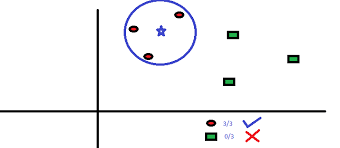<br>
* Scikit Learn provides an abstract function "KNeighborsClassifier"
* For more detailed explanation of the function, visit https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

In [20]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=3)
kfold = KFold(n_splits=10, random_state=0,shuffle=True)
cv_result = cross_val_score(model,X,Y, cv = kfold,scoring = "accuracy")
model_names.append("K-Nearest-Neighbors")
model_accuracy.append(cv_result.mean())
print("K-Nearest-Neighbors :",cv_result.mean())

K-Nearest-Neighbors : 0.6642857142857144


 ### Model-3 (Decision Trees) ###
 * Decision Trees (DTs) are a non-parametric supervised learning method used for classification and regression. 
 * The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features.
 * Here is an example :
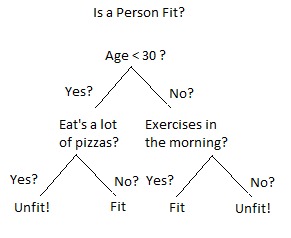
* This is most exactly what decision tree does.
* For more detailed explanation of the function, visit http://scikit-learn.org/stable/modules/tree.html


In [21]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
kfold = KFold(n_splits=10, random_state=0,shuffle=True)
cv_result = cross_val_score(model,X,Y, cv = kfold,scoring = "accuracy")
model_names.append("Decision Trees")
model_accuracy.append(cv_result.mean())
print("Decision Trees :",cv_result.mean())

Decision Trees : 0.645021645021645


 ### Model-4 (Random Forest Classifier) ###
 * This is one of the best classifiers presently in use which has a concept of ensembling.
 * Ensembling is a process of combining multiple models, train them parallely, and select the most suitable outcome.
* The core working of this model is same as decision trees, except that many trees are constructed and the most voted output is considered.<br>
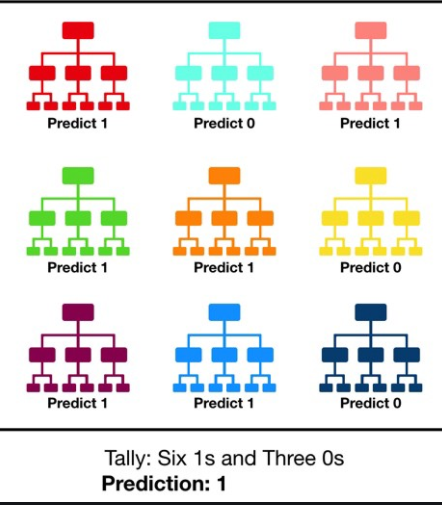
* For more detailed explanation of the function, visit https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [22]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators = 500)
kfold = KFold(n_splits=10, random_state=0,shuffle=True)
cv_result = cross_val_score(model,X,Y, cv = kfold,scoring = "accuracy")
model_names.append("Random Forest")
model_accuracy.append(cv_result.mean())
print("Random Forest :",cv_result.mean())

Random Forest : 0.786147186147186


 ### Model-4 (Support Vector Machines) ###
 * Support vector Machines are robust classifiers.
 * SVC's divide the entire space by hyperplanes(high dimensional lines) to divide each class.
 * Additional to that, it maintains the best seperation between the classes by maintaining large possible distance from the near points(support vectors).<br>
 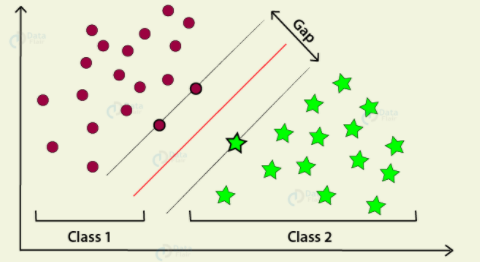
 * For more detailed explanation of the function, visit https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

In [23]:
from sklearn.svm import SVC
model = SVC( kernel = "linear") #linear hyperplane, we can also choose non-linear
kfold = KFold(n_splits=10, random_state=0,shuffle=True)
cv_result = cross_val_score(model,X,Y, cv = kfold,scoring = "accuracy")
model_names.append("Support Vector Classifier")
model_accuracy.append(cv_result.mean())
print("Support Vector Classifier :",cv_result.mean())

Support Vector Classifier : 0.6229437229437228


## Model-5 (XGB Classifier)
* Same as the random forest's ensembling method, Gradient boosting is an ensembling method where multiple calssifiers are used.
* Unlike Random Forests, they are boosted. This means, instead of choosing majority of many individuals, each individual is built upon the mistakes of previous individuals
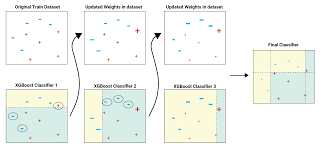
* For more detailed explanation of the function, visit https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html

In [24]:
from xgboost import XGBClassifier
model = XGBClassifier() #linear hyperplane, we can also choose non-linear
kfold = KFold(n_splits=10, random_state=0,shuffle=True)
cv_result = cross_val_score(model,X,Y, cv = kfold,scoring = "accuracy")
model_names.append("XGB Classifier")
model_accuracy.append(cv_result.mean())
print("XGB Classifier :",cv_result.mean())

XGB Classifier : 0.7629870129870129


## Model Tuning 
* We also perform model tuning also called hyperparameter tuning to see which parameters for the models works best.
* We leave it as an excercise for you to explore different parameters and create intuitions for better understanding.

# Model Evaluation
 * k-fold cross validation is a good technique for model evaluation which we have already done.
 * But we shall look at an another popular way of evaluation which is using a confusion matrix.
 * We will evaluate this metric on only Random Forest method which gave the best accuracy.
 * For practice, you implement this metric for other models we defined above.

## Confusion Matrix
* A classification problem can be evaluated by using many scoring techniques.
* But, for any scoring technique, the base is a confusion matrix.
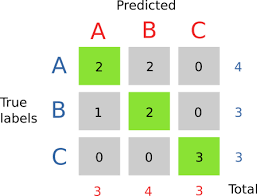
* The key attributes in a confusion matrix are:<br><br>
    1) **True Positive (TP):** It refers to the number of predictions where the classifier correctly predicts the positive class as positive.<br><br>
    2) **True Negative (TN):** It refers to the number of predictions where the classifier correctly predicts the negative class as negative.<br><br>
    3) **False Positive (FP):** It refers to the number of predictions where the classifier incorrectly predicts the negative class as positive.<br><br>
    4) **False Negative (FN):** It refers to the number of predictions where the classifier incorrectly predicts the positive class as negative.<br><br>


In [25]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42) #Splitting data into test and train with 0.3 fraction
model = RandomForestClassifier(n_estimators = 500)
model.fit(X_train,y_train)                            #Training on X_train
y_pred = model.predict(X_test)                        #Predicting on X_test
confusion_mat = confusion_matrix(y_test, y_pred)    #Constructing the confusion matrix

### Plotting the confusion matrix.
* refer "https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html" for more options.


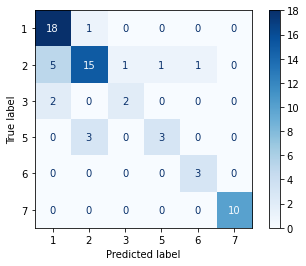

In [26]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
disp = plot_confusion_matrix(model, X_test, y_test,cmap=plt.cm.Blues)

## What and why confusion matrix????
* Consider an example of binary classification where we classify dog or not a dog.
* We have done preprocessing and training and its time to test the model.
* Let's make the following definitions:<br>
    "Dog" is a positive class.<br>
    "Not a dog" is a negative class.<br>
* We can summarize our "dog-prediction" model using a 2x2 confusion matrix that depicts all four possible outcomes:<br>
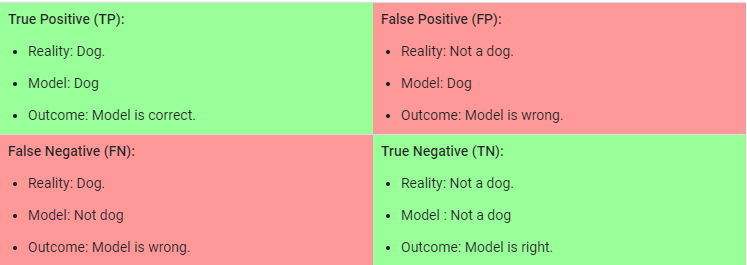


* So, fine. We can take accuracy as the metric and evaluate the model.<br>
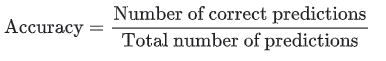
* But, Accuracy alone doesn't tell the full story when you're working with a class-imbalanced data set, like this one, where there is a significant disparity between the number of positive and negative labels.

### Precision and Recall
* Enter precision and recall.
* **Precision** attempts to answer the following question:<br>
What proportion of positive identifications was actually correct?
* **Recall** attempts to answer the following question:<br>
What proportion of actual positives was identified correctly?
* To fully evaluate the effectiveness of a model, you must examine both precision and recall. Unfortunately, precision and recall are often in tension. That is, improving precision typically reduces recall and vice versa.<br>
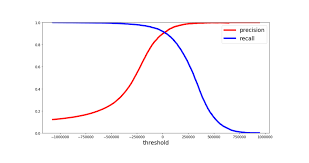

### F1-SCORE
* Since precision and recall individually cannot determine the model capacity, we have **f1-score**.
* F1 Score might be a better measure to use if we need to seek a balance between Precision and Recall AND there is an uneven class distribution (large number of Actual Negatives)<br>
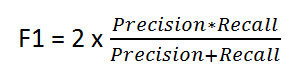
* sklearn provides well defines implementation of this f1-score.
* The parameters requird are ground truth,predictions and since we are woring on multiclass classification and an imbalanced dataset, we choose the averaging option to be weighted.
* refer to "https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html" for more information

In [27]:
from sklearn.metrics import f1_score
s1 = f1_score(y_test, y_pred, average='weighted')
print(s1)

0.7758641358641359


* Feel free to try the f1-score metric with other models too. It will be a good practice.

# Summary
* Due to the soft limit on the size of notebook and also long notebooks does not engage you well, we have given all the basics of solving a multiclass classification problem in a precise way.
* Please make yourself more comfortable with the libraries by visiting the given URL's.
* We wish, this notebook removes your fear of implementing an algorithm and motivates you to start the habit of reffering and learning from notebooks and make your hands dirty.

#                           Thank You